In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

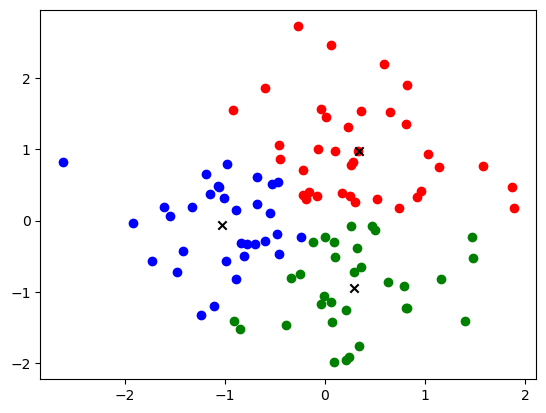

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans(X, K, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(range(len(X)), size=K, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(x)
        
        # Update centroids
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                # If a centroid has no assigned points, keep the previous centroid value
                new_centroids.append(centroids[clusters.index(cluster)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, clusters

# Load data from CSV file
data = pd.read_csv('/kaggle/input/k-means-data/data.csv')

# Convert data to numpy array
X = data.values

# Perform k-means clustering
K = 3
centroids, clusters = kmeans(X, K)

# Convert centroids list to numpy array
centroids = np.array(centroids)

# Plot the clusters and centroids
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x')
plt.show()
